<a href="https://colab.research.google.com/github/LeanderReascos/NBA2k19bad_edition/blob/master/TensorFlow_Probability%20/TensorFlow_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30pt"> TensorFlow Probability </h1><hr>

<img src='https://www.amd.com/system/files/2019-11/343814-tensorflow-logo-1260wide.png' style='width:10%'>

<img src='https://raw.githubusercontent.com/LeanderReascos/probabilistic_programming/main/TensorFlow_Probability/QR_COLAB.svg'>

<strong>https://bit.ly/3FFa3mx</strong><br>
<strong>https://github.com/LeanderReascos/probabilistic_programming</strong>

<p style="font-size:14pt"> TensorFlow Probability <i>TFP</i> é uma libraria de Python desenvolvida por cima de <i>TensorFlow</i>, pensada para data scientists, estadisticos e investigadores em Machine Learning. Permitindo entender a informação e fazer predições com ela, facilitando o proceso combinando modelos probabilisticos e deep learning em hardware moderno (TPU, GPU). </p>

## Referencias
- <a href='https://www.tensorflow.org/'>TensorFlow</a>
- <a href='https://www.tensorflow.org/probability'>TensorFlow Probability</a>
- <a href='https://github.com/tensorflow/probability'>TensorFlow Probability on GitHub</a>




<a href="https://www.tensorflow.org/api_docs/python/tf/Tensor"><h2>Tensor</h2></a>

É uma matriz de n dimensões de um unico tipo de dado. O seu uso é conveniente para acelerar os calculos pois é realizado reccorendo a grafos cujas operações são normalmente calculadas em cores orientados a calculos com este tipo de dado.

<img src='https://raw.githubusercontent.com/LeanderReascos/probabilistic_programming/093d08509c8c7c4fa2b9c49655dd7649f290a957/TensorFlow_Probability/tensor.svg'>

<img src='https://images.nvidia.com/aem-dam/Solutions/Data-Center/tesla-t4/Turing-Tensor-Core_30fps_FINAL_736x414.gif'>

ref: <a href="https://www.nvidia.com/en-us/data-center/tensor-cores/"> Tensor Cores Nvidia </a>

<h2 style="font-size:25pt"> Ferramentas </h2>

As ferramentas usadas por TFP:
- **TensorFlow**
- **Modelos Estadisticos**
    - Distribuições (<a href='https://github.com/tensorflow/probability/tree/main/tensorflow_probability/python/distributions'> tfp.distributions </a>)
    - Bijectores (<a href='https://github.com/tensorflow/probability/tree/main/tensorflow_probability/python/bijectors'> tfp.bijectors </a>)
- **Construção de Modelos**
    - Distribuições Conjuntas (<a href='https://github.com/tensorflow/probability/tree/main/tensorflow_probability/python/distributions/joint_distribution_sequential.py'> tfp.distributions.JointDistributionSequential </a>)
    - Capas probabilisticas (<a href='https://github.com/tensorflow/probability/tree/main/tensorflow_probability/python/layers'> tfp.layers </a>)
- **Inferencia**
    - Markov chain Monte Carlo
    - Variational Inference
    - Optimizers 
    - Monte Carlo

<h2 style="font-size:30pt"> Instalação </h2>

1. Instalação do Python3. (Recomendado o uso de <a href='https://docs.conda.io/en/latest/miniconda.html'>miniconda</a>)
    - Linux
        ~~~~
        sudo apt install python3-dev python3-pip python3-venv
        ~~~~
2. Instalação do TensorFlow 
    ~~~~
    pip install tensorflow
    ~~~~
3. Instalação do TensorFlow Probability
    ~~~~
    pip install tensorflow_probability
    ~~~~
4. Controladores de GPU (Opcional, NVIDIA)
    - Instalação de <a href='https://www.tensorflow.org/install/gpu'>TF para GPU</a>
        ~~~~
        pip install tensorflow-gpu
        ~~~~
    - Software de NVIDIA necesario
        <UL>
        <LI><a href='https://www.nvidia.com/drivers'>NVIDIA® GPU drivers</a></LI>
        <LI><a href='https://developer.nvidia.com/cuda-toolkit-archive'>CUDA® Toolkit</a></LI>
        <LI><a href='https://developer.nvidia.com/rdp/cudnn-archive'>cuDNN</a></LI>
        </UL>



# Imports

In [1]:
#@title Imports  {display-mode: "form"}
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

In [2]:
devices = tf.config.list_physical_devices()
for device in devices:
    print(f'{device.device_type} {device.name}')

CPU /physical_device:CPU:0


In [3]:
if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

Using a CPU


In [4]:
#@title Utils { display-mode: "form" }
def print_subclasses_from_module(module, base_class, maxwidth=80):
  import functools, inspect, sys
  subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
  def red(acc, x):
    if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
      acc.append(x)
    else:
      acc[-1] += ", " + x
    return acc
  print('\n'.join(functools.reduce(red, subclasses, [])))

# Modelos Estatisticos

## Distribuições
O modulo ```tfd``` contem varias possiveis distribuições de probabilidad que podemos ussar. De esta forma criamos um modelo que segue aquela distribuição e podemos fazer inferencias, calcular probabilidades ou gerar numeros aleartorios. 

```Model = tfd.Distribution(parameters)```

Cada Distribuição contem pelo menos dois metodos: 

```Model.sample```

```Model.log_prob```

ref: <a href='https://www.tensorflow.org/probability/api_docs/python/tfp/distributions'>Distribuições</a>

In [5]:
print_subclasses_from_module(tfp.distributions, tfp.distributions.Distribution)

Autoregressive, BatchBroadcast, BatchConcat, BatchReshape, Bates, Bernoulli
Beta, BetaBinomial, BetaQuotient, Binomial, Blockwise, Categorical, Cauchy, Chi
Chi2, CholeskyLKJ, ContinuousBernoulli, DeterminantalPointProcess, Deterministic
Dirichlet, DirichletMultinomial, Distribution, DoublesidedMaxwell, Empirical
ExpGamma, ExpInverseGamma, ExpRelaxedOneHotCategorical, Exponential
ExponentiallyModifiedGaussian, FiniteDiscrete, Gamma, GammaGamma
GaussianProcess, GaussianProcessRegressionModel, GeneralizedExtremeValue
GeneralizedNormal, GeneralizedPareto, Geometric, Gumbel, HalfCauchy, HalfNormal
HalfStudentT, HiddenMarkovModel, Horseshoe, Independent, InverseGamma
InverseGaussian, JohnsonSU, JointDistribution, JointDistributionCoroutine
JointDistributionCoroutineAutoBatched, JointDistributionNamed
JointDistributionNamedAutoBatched, JointDistributionSequential
JointDistributionSequentialAutoBatched, Kumaraswamy, LKJ, LambertWDistribution
LambertWNormal, Laplace, LinearGaussianStateSpaceMod

### Exemplo 1. No aeroporto internacional Mariscal Sucre em Quito, Equador  para o ano de 2019 temos a seguinte informação de pasajeiros:

|    | Tipo          |   Janeiro |   Fevereiro |   Marco |   Abril |   Maio |   Junho |   Julho |   Agosto |   Setembro |   Outubro |   Novembro |   Dezembro |
|---:|:--------------|----------:|------------:|--------:|--------:|-------:|--------:|--------:|---------:|-----------:|----------:|-----------:|-----------:|
|  0 | Internacional |    188311 |      173344 |  198836 |  183714 | 188462 |  193339 |  228633 |   248493 |     208892 |    163644 |     177966 |     177108 |
|  1 | Nacional      |    221220 |      216300 |  225630 |  232862 | 231184 |  225490 |  249290 |   237214 |     209216 |    200838 |     222444 |     235220 |

Ref: <a href="https://www.aeropuertoquito.com/estadisticas-de-vuelos-2019/">Estadisticas de Vuelos 2019 UIO</a>

In [6]:
csv = 'https://raw.githubusercontent.com/LeanderReascos/probabilistic_programming/093d08509c8c7c4fa2b9c49655dd7649f290a957/TensorFlow_Probability/UIO.csv'
vuelosUIO = pd.read_csv(csv,delimiter=';')
vuelosUIO

,Tipo,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,Internacional,188311,173344,198836,183714,188462,193339,228633,248493,208892,163644,177966,177108
1,Nacional,221220,216300,225630,232862,231184,225490,249290,237214,209216,200838,222444,235220


In [7]:
pasajerosI = np.array(vuelosUIO.iloc[0].values[1:],float)/10**3
pasajerosN = np.array(vuelosUIO.iloc[1].values[1:],float)/10**3
pasajeros = pasajerosI+pasajerosN
months = vuelosUIO.columns[1:]

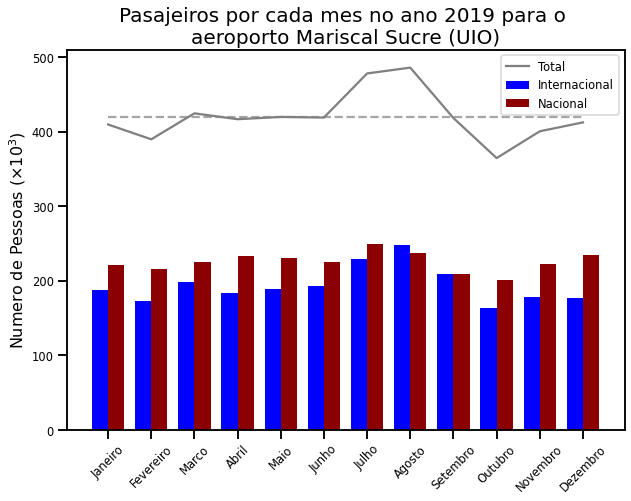

In [ ]:
#@title UIO-data { display-mode: "form" }
width = 0.75
fig, ax = plt.subplots(figsize=(10,7))
m = np.arange(0,24,2)
xI = m - width/2
xN = m + width/2
ax.bar(xI,pasajerosI,width=width,label='Internacional',color='blue')
ax.bar(xN,pasajerosN,width=width,label='Nacional',color='darkred')
ax.plot(m,[np.mean(pasajerosI+pasajerosN)]*12,ls='--',color='gray',alpha=0.7)
ax.plot(m,pasajerosI+pasajerosN,label='Total',color='gray')
ax.set_title('Pasajeiros por cada mes no ano 2019 para o \naeroporto Mariscal Sucre (UIO)',fontsize=20)
ax.set_xticks(m)
ax.set_xticklabels(months,rotation=45);
ax.set_ylabel(r'Numero de Pessoas ($\times10^3$)',fontsize=16)
ax.legend()

In [8]:
'''Definir o Modelo com os seus parametros'''
meanI = np.mean(pasajerosI)
meanN = np.mean(pasajerosN)
UIO_I = tfd.Poisson(meanI,name="UIO Internacional")
UIO_N = tfd.Poisson(meanN,name="UIO Nacional")

In [9]:
predictI = UIO_I.sample(12)
predictN = UIO_N.sample(12)
predict = predictI + predictN

In [10]:
# Experimente com o seu proprio modelo
UIO = 
predict2 = UIO.sample(12)

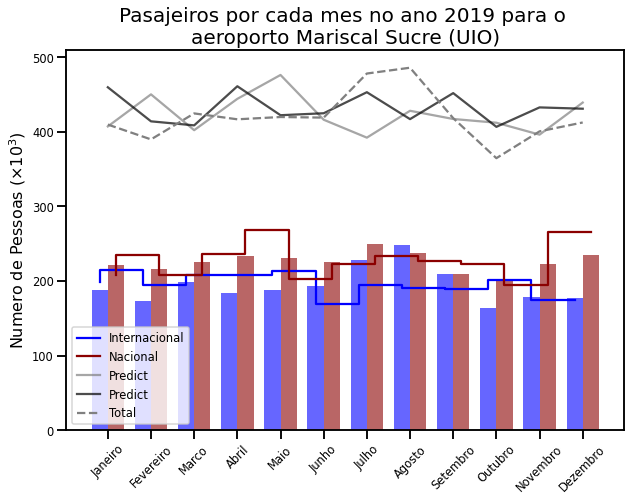

In [11]:
#@title UIO-predict { display-mode: "form" }
width = 0.75
fig, ax = plt.subplots(figsize=(10,7))
m = np.arange(0,24,2)
xI = m - width/2
xN = m + width/2
ax.bar(xI,pasajerosI,width=width,color='blue',alpha=0.6)
ax.bar(xN,pasajerosN,width=width,color='darkred',alpha=0.6)
ax.step(xI,predictI,label='Internacional',color='blue')
ax.step(xN,predictN,label='Nacional',color='darkred')
ax.plot(m,predict,color='gray',alpha=0.7,label='Predict')
ax.plot(m,predict2,color='black',alpha=0.7,label='Predict')
ax.plot(m,pasajerosI+pasajerosN,label='Total',color='gray',ls='--')
ax.set_title('Pasajeiros por cada mes no ano 2019 para o \naeroporto Mariscal Sucre (UIO)',fontsize=20)
ax.set_xticks(m)
ax.set_xticklabels(months,rotation=45);
ax.set_ylabel(r'Numero de Pessoas ($\times10^3$)',fontsize=16)
ax.legend()

### Exemplo 2. No mes de Abril no aeroporto UIO por causa da pandemia teve um total de 6661 pasajeiros

Ref: <a href="https://www.aeropuertoquito.com/estadisticas-de-vuelos-2020/">Estadisticas de Vuelos 2020 UIO</a>

In [12]:
UIO_Normal = tfd.Normal(np.mean(pasajeros),np.std(pasajeros),name='UIO Normal')
UIO_Poisson = tfd.Poisson(np.mean(pasajeros),name="UIO Poisson")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


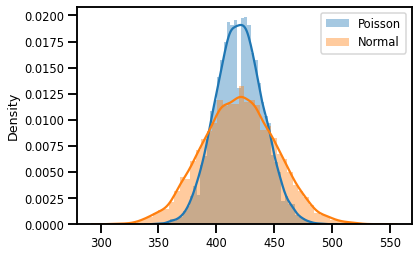

In [13]:
N = 1e4
samplesUIO_Poisson = UIO_Poisson.sample(N)
samplesUIO_Normal = UIO_Normal.sample(N)
sns.distplot(samplesUIO_Poisson,label='Poisson');
sns.distplot(samplesUIO_Normal,label='Normal');
plt.legend()

In [14]:
Np = 6661/10**3
print(f'CDF: Probabilidade de ter < 6.661 mil passageiros num mes: {UIO_Normal.cdf(Np)}')
values = np.linspace(0,Np,10000)
probs = UIO_Normal.prob(values)*(values[1]-values[0])
print(f'PDF: Probabilidade de ter < 6.661 mil passageiros num mes: {np.sum(probs)}')

CDF: Probabilidade de ter < 6.661 mil passageiros num mes: 1.6700825646988376e-38
PDF: Probabilidade de ter < 6.661 mil passageiros num mes: 1.5614090233583736e-38


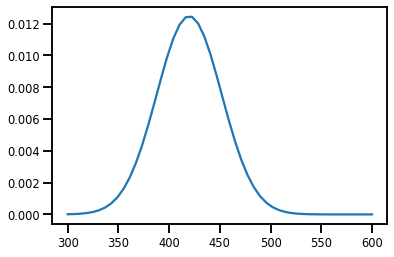

In [15]:
x = np.linspace(300,600)
prob = UIO_Normal.prob(x)
plt.plot(x,prob)

In [ ]:
# Calcule a probabilidade de no mesmo aeroporto ter mais de 400 Mil passajeiros
Modelo =  
prob = 
print(f'A probabilidade de ter mais do que 400 Mil passajeiros: {prob}')

## Bijectors

ref: <a href='https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/Bijector'>Bijectores</a>

In [16]:
print_subclasses_from_module(tfp.bijectors, tfp.bijectors.Bijector)

AbsoluteValue, Ascending, AutoCompositeTensorBijector, BatchNormalization
Bijector, Blockwise, Chain, CholeskyOuterProduct, CholeskyToInvCholesky
Composition, CorrelationCholesky, Cumsum, DiscreteCosineTransform, Exp, Expm1
FFJORD, FillScaleTriL, FillTriangular, FrechetCDF, GeneralizedExtremeValueCDF
GeneralizedPareto, Glow, GompertzCDF, GumbelCDF, Identity, Inline, Invert
IteratedSigmoidCentered, JointMap, KumaraswamyCDF, LambertWTail, Log, Log1p
MaskedAutoregressiveFlow, MatrixInverseTriL, MatvecLU, MoyalCDF, NormalCDF
Ordered, Pad, Permute, Power, PowerTransform, RationalQuadraticSpline
RayleighCDF, RealNVP, Reciprocal, Reshape, Restructure, Scale, ScaleMatvecDiag
ScaleMatvecLU, ScaleMatvecLinearOperator, ScaleMatvecLinearOperatorBlock
ScaleMatvecTriL, Shift, ShiftedGompertzCDF, Sigmoid, Sinh, SinhArcsinh, SoftClip
Softfloor, SoftmaxCentered, Softplus, Softsign, Split, Square, Tanh
TransformDiagonal, Transpose, WeibullCDF


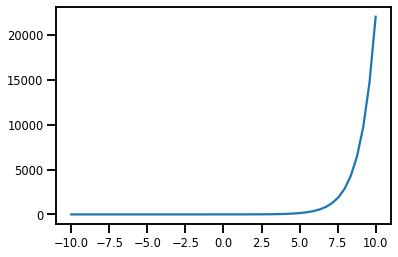

In [17]:
exp = tfp.bijectors.Exp()
xs = np.linspace(-10,10)
plt.plot(xs,exp.forward(xs))

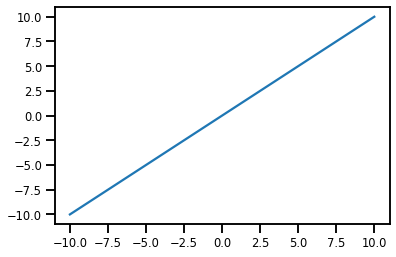

In [18]:
exp = tfp.bijectors.Exp()
xs = np.linspace(-10,10)
ys = exp.forward(xs)
plt.plot(xs,exp.inverse(ys))

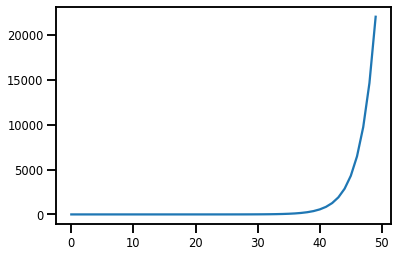

In [19]:
plt.plot(np.exp(exp.forward_log_det_jacobian(xs)))

Para uma variavel aleartoria $X$ que segue uma distribuição $p(X)$ existe uma transformação $G(x)$ tal que transforma a distribuição de $X$ para uma distribuição $p(Y)$ de uma variavel aleartoria $y$.

* $X$ variavel aleartoria pdf $p(x)$
* $G$ função derivavel e invertivel de $X$
* $Y = G(X)$ nova variavel aleartoria
* $p(Y=y) = p(X=G^{-1}(y)) \cdot |\nabla G^{-1}(y)|$

Ref: <a href="https://tiao.io/post/building-probability-distributions-with-tensorflow-probability-bijector-api/"> Bijector API </a>

In [20]:
pX = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag = [1., 1.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


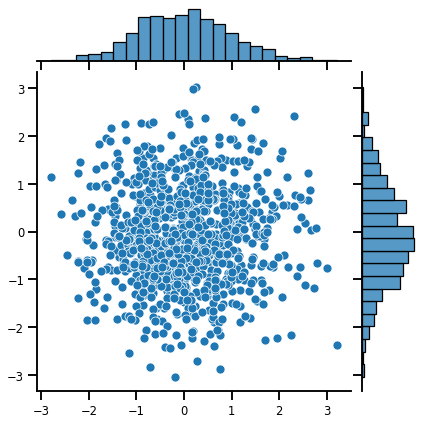

In [21]:
samples = pX.sample(1000)
g = sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


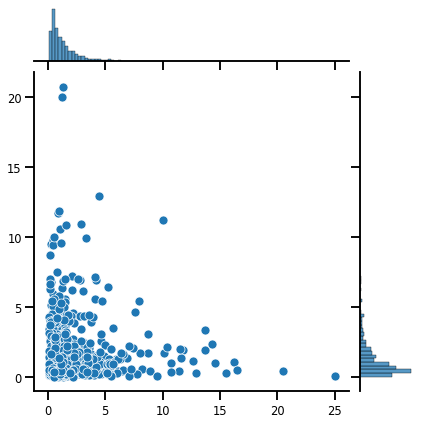

In [22]:
samples_pY = exp.forward(samples)
g = sns.jointplot(samples_pY[:, 0], samples_pY[:, 1], kind='scatter')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


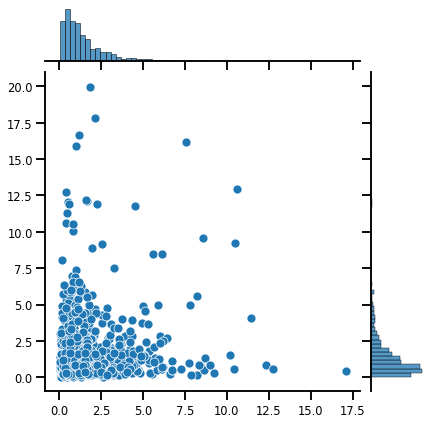

In [23]:
pY = tfd.TransformedDistribution(distribution=pX, bijector=exp)
samples_pY = pY.sample(1000)
g = sns.jointplot(samples_pY[:, 0], samples_pY[:, 1], kind='scatter')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


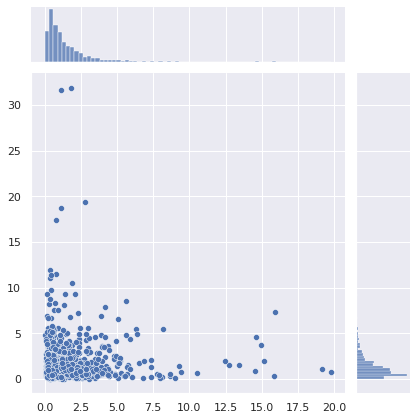

In [68]:
# Experimente um outro bijetor
bijector =  
pY = tfd.TransformedDistribution(distribution=pX, bijector=bijector)
samples_pY = pY.sample(1000)
g = sns.jointplot(samples_pY[:, 0], samples_pY[:, 1], kind='scatter')
plt.show()

0 19.757015


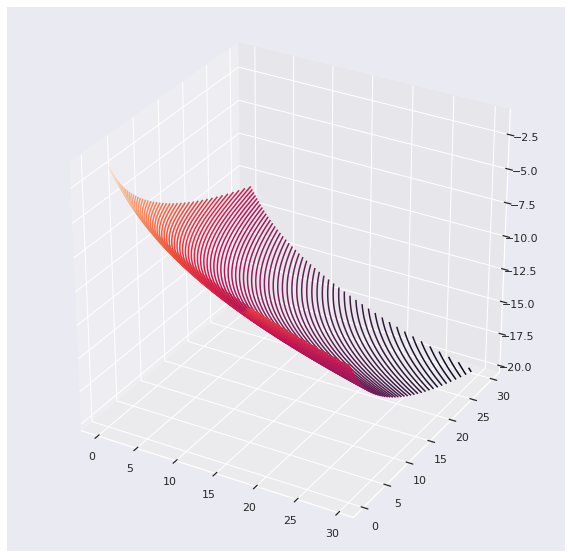

In [76]:
#@title Log_probs { display-mode: "form" }
x = samples_pY[:,0]
x = x[np.logical_not(np.isnan(x))]
min = np.min(x)
max = np.max(x)
print(min,max)
xs = np.linspace(min-np.abs(min)*0.5,max+np.abs(max)*0.5)
aux = [[i,j] for i in range(len(xs)) for j in range(len(xs))]
X = [[x,y] for x in xs for y in xs]
probs = pY.log_prob(X)
Z = np.zeros((len(xs),len(xs)),float)
for a,p in enumerate(probs):
    i,j = aux[a]
    Z[i,j] = p

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(xs,xs)
sns.set(style = "darkgrid")
ax.contour3D(X,Y,Z,100)

# Construção de Modelos

## Distribuições Conjuntas

ref: <a href="https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/JointDistribution">Distribuições Conjuntas</a>

Facilita a construção de modelos na qual temos diferentes variaveis aleartorias que podem seguir o mesmo ou diferentes distribuições e na qual queremos saber as suas probabilidades conjuntas do tipo $$P(X=x_i,Y=y_j)$$

P(0)=0.50 P(1)=0.50


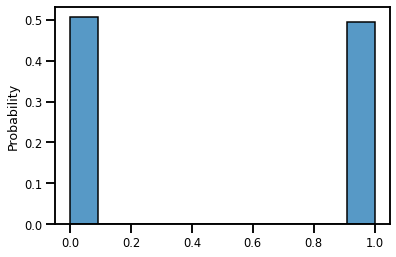

In [24]:
Coin = tfd.Binomial(1.,probs=0.5)
samples = Coin.sample(1000)
sns.histplot(samples,stat='probability');
print(f"P(0)={Coin.prob(0):.2f} P(1)={Coin.prob(1):.2f}")

P(Coin_1= 0 ,Coin_2= 0)=0.25
P(Coin_1= 0 ,Coin_2= 1)=0.25
P(Coin_1= 1 ,Coin_2= 0)=0.25
P(Coin_1= 1 ,Coin_2= 1)=0.25


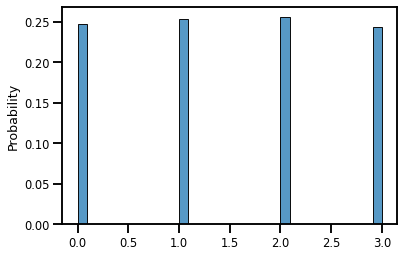

In [25]:
Coin_Coin = tfd.JointDistributionSequential([Coin,Coin])
N = 10000
samples = Coin_Coin.sample(N)
samples = samples[0]+samples[1]*2
sns.histplot(samples,stat='probability')
for i in range(2):
    for j in range(2):
        print(f'P(Coin_1= {i} ,Coin_2= {j})={Coin_Coin.prob([i,j]):.2f}')

### Escreva uma função que receba o número de dados e o número de faces de cada dado e imprima o histograma relativo a 10,000 lançamentos.

~~~
var make_dice = function(n){
  return function(){return categorical({vs:mapN(function(x){return x+1},n)})}
}

var make_dices = function(N,n){
  return function(){
    var dice = make_dice(n)
    return sum(repeat(N,dice))
  }
}
~~~

In [26]:
make_dice = lambda faces: tfd.Categorical(probs=[1/faces]*faces)
make_dices = lambda N,faces: tfd.JointDistributionSequential([make_dice(faces)]*N)

Plot Hist para 2 dados 6 faces
~~~
var dice = make_dices(2,6)
viz(repeat(10000,dice))
~~~

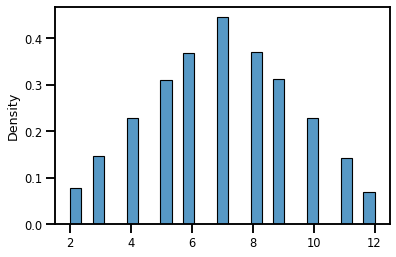

In [27]:
model = make_dices(2,6)
sns.histplot(np.sum(model.sample(10000),axis=0)+2,stat='density')

<strong> Exercicio:</strong>
Crie um modelo para dois ou mais dados dos quais a metade sao de n1 caras e a outra metade de n2 caras

### Quando não são independentes

$$P(X_1,X_2) = P(X_1)P(X_2|X_1)$$
$$P(X_1,X_2,\dots,X_n) = P(X_1)P(X_2|X_1)\dots P(X_n|X_1,\dots,X_{n-1})$$

In [28]:
p_C = 0.01 # Probabilidade de ter covid
p_AC = 0.7 # Probabilidade de teste A sabendo q tem Covid P(A|C)
p_ANC = 0.1 # Probabilidade de teste A positivo sabendo q nao tem Covid P(A|~C)

Root = tfd.JointDistributionCoroutine.Root
def model():
  covid = yield Root(tfd.Binomial(1.,probs=p_C))
  _ = yield Root(tfd.Binomial(covid,probs=p_AC))
  _ = yield Root(tfd.Binomial(1-covid,probs=p_ANC))
  
modelo = tfd.JointDistributionCoroutine(model)

In [30]:
modelo.prob([1,1,0])+modelo.prob([0,0,1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.106>

<strong>Exercicio: </strong> Repita o Exercicio para o teste B

## Capas probabilisticas
<img src='https://raw.githubusercontent.com/LeanderReascos/probabilistic_programming/f1b8a0325631102ae88f9184d0595afb4677b25f/TensorFlow_Probability/layers.svg'>

ref: <a href="https://www.tensorflow.org/probability/api_docs/python/tfp/layers">layers</a>

Usadas em tecnicas de Machine Learning de forma a tornar os os modelos de inferencia em modelos probabilisticos

ref: 
- <a href="https://colab.research.google.com/github/tensorflow/probability/blob/main/tensorflow_probability/examples/jupyter_notebooks/Probabilistic_Layers_Regression.ipynb#scrollTo=CpDUTVKYTowI">Colab Layer Regresion TensorFlow</a>
- <a href="https://blog.tensorflow.org/2019/03/regression-with-probabilistic-layers-in.html">Regresion with probabilist layers </a>

$$y = \left[w_0x(1+\sin{x})+b_0\right]+\varepsilon$$
$$\varepsilon \sim Normal(0,1)$$

$w_0 = 0.125$;
$b_0 = 5$

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


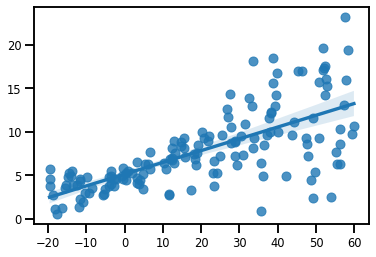

In [31]:
#@title Load Dataset { display-mode: "form" }
w0 = 0.125
b0 = 5.
x_range = [-20, 60]

def load_dataset(n=150, n_tst=150):
  np.random.seed(43)
  def s(x):
    g = (x - x_range[0]) / (x_range[1] - x_range[0])
    return 3 * (0.25 + g**2.)
  x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
  eps = np.random.randn(n) * s(x)
  y = (w0 * x * (1. + np.sin(x)) + b0) + eps
  x = x[..., np.newaxis]
  x_tst = np.linspace(*x_range, num=n_tst).astype(np.float32)
  x_tst = x_tst[..., np.newaxis]
  return y, x, x_tst

y, x, x_tst = load_dataset()

sns.regplot(x,y)

In [32]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False)

[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)

0.13642648
5.125506


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


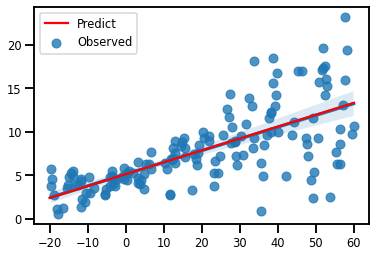

In [33]:
#@title No uncertainty.
w = np.squeeze(model.layers[-2].kernel.numpy())
b = np.squeeze(model.layers[-2].bias.numpy())
sns.regplot(x,y,label='Observed')
plt.plot(x_tst,yhat.mean(),label='Predict',color='red')
plt.legend()

In [34]:
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
  n = kernel_size + bias_size
  c = np.log(np.expm1(1.))
  return tf.keras.Sequential([
      tfp.layers.VariableLayer(2 * n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t[..., :n],
                     scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
          reinterpreted_batch_ndims=1)),
    ])

def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t, scale=1),
            reinterpreted_batch_ndims=1)),
    ])

In [35]:
model = tf.keras.Sequential([
  tfp.layers.DenseVariational(1 + 1, posterior_mean_field, prior_trainable, kl_weight=1/x.shape[0]),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.01 * t[...,1:]))),
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)

[ 0.13562474  2.4941647   5.1707497   3.5611904  -3.3305547  -0.81917006
 -2.0022871  -0.11950336]
[0.12706997 2.5549111  5.171168   3.4882083 ]


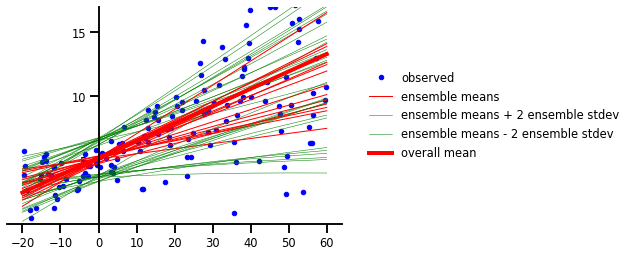

In [36]:
#@title Aleatoric & Epistemic Uncertainty
plt.plot(x, y, 'b.', label='observed');

yhats = [model(x_tst) for _ in range(100)]
avgm = np.zeros_like(x_tst[..., 0])
for i, yhat in enumerate(yhats):
  m = np.squeeze(yhat.mean())
  s = np.squeeze(yhat.stddev())
  if i < 15:
    plt.plot(x_tst, m, 'r', label='ensemble means' if i == 0 else None, linewidth=1.)
    plt.plot(x_tst, m + 2 * s, 'g', linewidth=0.5, label='ensemble means + 2 ensemble stdev' if i == 0 else None);
    plt.plot(x_tst, m - 2 * s, 'g', linewidth=0.5, label='ensemble means - 2 ensemble stdev' if i == 0 else None);
  avgm += m
plt.plot(x_tst, avgm/len(yhats), 'r', label='overall mean', linewidth=4)

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
plt.show()

In [37]:
#@title Custom PSD Kernel
class RBFKernelFn(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super(RBFKernelFn, self).__init__(**kwargs)
    dtype = kwargs.get('dtype', None)

    self._amplitude = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype,
            name='amplitude')
    
    self._length_scale = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype,
            name='length_scale')

  def call(self, x):
    # Never called -- this is just a layer so it can hold variables
    # in a way Keras understands.
    return x

  @property
  def kernel(self):
    return tfp.math.psd_kernels.ExponentiatedQuadratic(
      amplitude=tf.nn.softplus(0.1 * self._amplitude),
      length_scale=tf.nn.softplus(5. * self._length_scale)
    )

In [38]:
tf.keras.backend.set_floatx('float64')

num_inducing_points = 40
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1]),
    tf.keras.layers.Dense(1, kernel_initializer='ones', use_bias=False),
    tfp.layers.VariationalGaussianProcess(
        num_inducing_points=num_inducing_points,
        kernel_provider=RBFKernelFn(),
        event_shape=[1],
        inducing_index_points_initializer=tf.constant_initializer(
            np.linspace(*x_range, num=num_inducing_points,
                        dtype=x.dtype)[..., np.newaxis]),
        unconstrained_observation_noise_variance_initializer=(
            tf.constant_initializer(np.array(0.54).astype(x.dtype))),
    ),
])

batch_size = 32
loss = lambda y, rv_y: rv_y.variational_loss(
    y, kl_weight=np.array(batch_size, x.dtype) / x.shape[0])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=loss)
model.fit(x, y, batch_size=batch_size, epochs=1000, verbose=False)

yhat = model(x_tst)

Instructions for updating:
`jitter` is deprecated; please use `marginal_fn` directly.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/distributions/gaussian_process.py:376: UserWarning: Unable to detect statically whether the number of index_points is 1. As a result, defaulting to treating the marginal GP at `index_points` as a multivariate Gaussian. This makes some methods, like `cdf` unavailable.
  'Unable to detect statically whether the number of index_points is '


Instructions for updating:
the `jitter` property of `tfd.GaussianProcess` is deprecated; use the `marginal_fn` property instead.


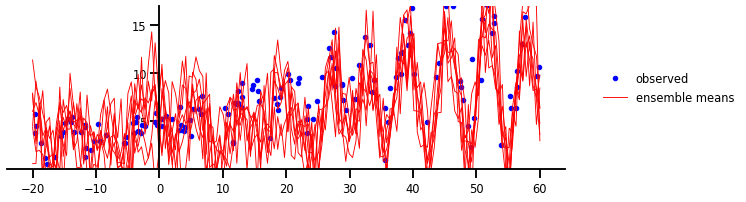

In [39]:
#@title Functional Uncertainty
y, x, _ = load_dataset()
plt.figure(figsize=[10, 3])
plt.plot(x, y, 'b.', label='observed');

num_samples = 7
for i in range(num_samples):
  sample_ = yhat.sample().numpy()
  plt.plot(x_tst,
           sample_[..., 0].T,
           'r',
           linewidth=0.9,
           label='ensemble means' if i == 0 else None);

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

## HamiltonianMonteCarlo

ref: <a href="https://www.tensorflow.org/probability/api_docs/python/tfp/mcmc">MCMC</a><br><a href='https://juanitorduz.github.io/tfp_hcm/'>Example</a>

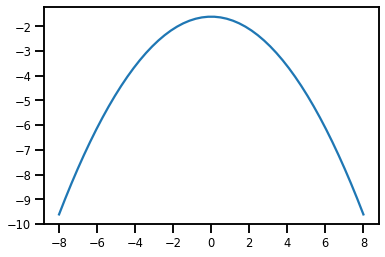

In [40]:
model = tfd.Normal(0,2)
plt.plot(np.linspace(-8,8),model.log_prob(np.linspace(-8,8)))

In [41]:
mcmc = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn = lambda x: model.log_prob(x),
    step_size=1.0,
    num_leapfrog_steps=3
)

adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
  inner_kernel = mcmc,
  num_adaptation_steps=1
)

In [42]:
samples, is_accepted = tfp.mcmc.sample_chain(
      num_results=1000,
      num_burnin_steps=10,
      current_state=1.0,
      kernel=adaptive_hmc,
      trace_fn=lambda _, pkr: pkr.inner_results.is_accepted
    )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


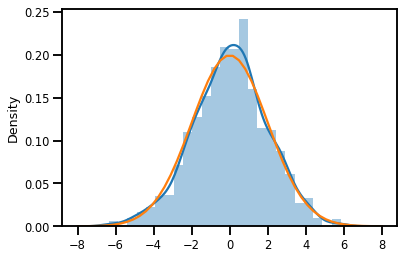

In [43]:
sns.distplot(samples)
plt.plot(np.linspace(-8,8),model.prob(np.linspace(-8,8)))